# Gestione dei missing values

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
match = pd.read_csv('output/match.csv')
tournament = pd.read_csv('output/tournament.csv')
player = pd.read_csv('output/players.csv')

match_originale = match.copy()
tournament_originale = tournament.copy()
player_originale = player.copy()

In [44]:
match.isna().sum()

match_num                  0
winner_id                  0
loser_id                   0
score                    169
best_of                    0
round                      0
minutes               104430
w_ace                 103782
w_df                  103782
w_svpt                103782
w_1stIn               103782
w_1stWon              103782
w_2ndWon              103782
w_SvGms               103778
w_bpSaved             103782
w_bpFaced             103782
l_ace                 103782
l_df                  103782
l_svpt                103782
l_1stIn               103782
l_1stWon              103782
l_2ndWon              103782
l_SvGms               103778
l_bpSaved             103782
l_bpFaced             103782
winner_rank            19372
winner_rank_points     19388
loser_rank             35232
loser_rank_points      35248
tourney_pk                 0
dtype: int64

In [45]:
match.describe()

,match_num,winner_id,loser_id,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,185764.000000,185764.000000,185764.000000,185764.000000,81334.000000,81982.000000,81982.000000,81982.000000,81982.000000,81982.000000,...,81982.000000,81982.000000,81982.000000,81986.000000,81982.000000,81982.000000,166392.000000,166376.000000,150532.000000,150516.000000
mean,160.464175,180105.888068,181613.891987,3.034162,97.695269,4.823388,2.855907,71.297004,44.270901,32.142848,...,44.565112,28.046169,12.715657,10.942612,4.658608,8.864238,383.957919,470.958107,434.321320,356.754518
std,289.562750,46571.821798,46645.664816,0.259146,41.516997,4.389558,2.420502,25.530921,16.950740,11.414119,...,16.777904,12.274711,6.322835,3.499454,3.148033,3.967422,314.201072,1041.945639,355.975553,703.270209
min,1.000000,100644.000000,100644.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,17.000000,122330.000000,124079.000000,3.000000,72.000000,2.000000,1.000000,53.000000,33.000000,24.000000,...,33.000000,19.000000,8.000000,9.000000,2.000000,6.000000,137.000000,49.000000,156.000000,35.000000
50%,130.000000,203526.000000,205815.000000,3.000000,91.000000,4.000000,2.000000,67.000000,42.000000,30.000000,...,42.000000,26.000000,12.000000,10.000000,4.000000,8.000000,298.000000,161.000000,325.000000,138.000000
75%,272.000000,214152.000000,214818.000000,3.000000,119.000000,7.000000,4.000000,87.000000,54.000000,38.000000,...,54.000000,35.000000,16.000000,13.000000,6.000000,11.000000,562.000000,439.000000,642.000000,378.000000
max,8312.000000,245099.000000,245099.000000,5.000000,4756.000000,75.000000,114.000000,1957.000000,1330.000000,836.000000,...,893.000000,532.000000,399.000000,50.000000,120.000000,190.000000,2220.000000,16950.000000,2257.000000,16950.000000


## Eliminazione sottogruppo nullo

In [46]:
match = match.dropna(subset=['w_ace'])
match_originale = match_originale.dropna(subset=['w_ace']) #Aggiorno anche il riferimento ai dati originali vista la quantità

In [47]:
match.isna().sum()

match_num                0
winner_id                0
loser_id                 0
score                    0
best_of                  0
round                    0
minutes                801
w_ace                    0
w_df                     0
w_svpt                   0
w_1stIn                  0
w_1stWon                 0
w_2ndWon                 0
w_SvGms                  0
w_bpSaved                0
w_bpFaced                0
l_ace                    0
l_df                     0
l_svpt                   0
l_1stIn                  0
l_1stWon                 0
l_2ndWon                 0
l_SvGms                  0
l_bpSaved                0
l_bpFaced                0
winner_rank            899
winner_rank_points     913
loser_rank            3123
loser_rank_points     3138
tourney_pk               0
dtype: int64

## Gestione dei rank

<AxesSubplot:xlabel='winner_rank', ylabel='Density'>

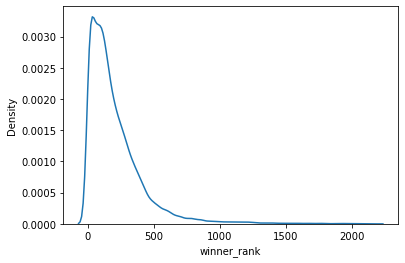

In [48]:
sns.kdeplot(data=match, x="winner_rank")

<AxesSubplot:xlabel='winner_rank_points', ylabel='Density'>

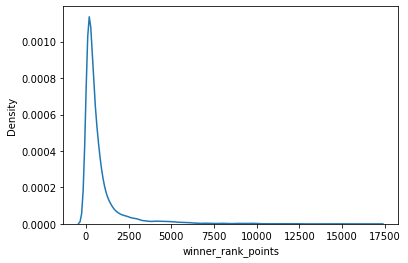

In [49]:
sns.kdeplot(data=match, x="winner_rank_points")

<AxesSubplot:xlabel='loser_rank', ylabel='Density'>

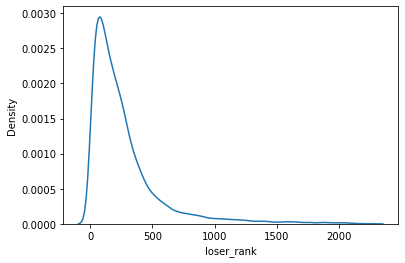

In [50]:
sns.kdeplot(data=match, x="loser_rank")

<AxesSubplot:xlabel='loser_rank_points', ylabel='Density'>

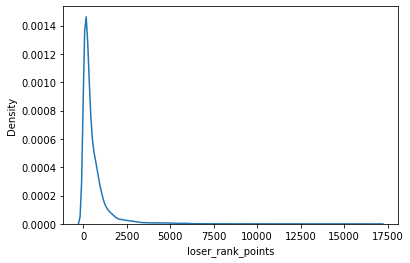

In [51]:
sns.kdeplot(data=match, x="loser_rank_points")

<AxesSubplot:xlabel='minutes', ylabel='Density'>

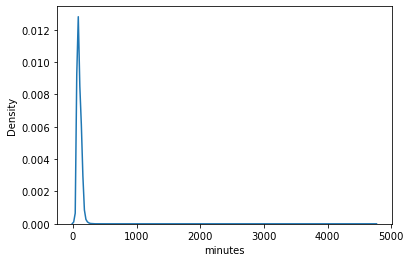

In [52]:
sns.kdeplot(data=match, x="minutes")

In [53]:
match[match.minutes > 500]['minutes'] #outliers

39548     1146.0
44289     1531.0
55054     2475.0
78869     1094.0
84424     1237.0
99504     1266.0
108907    1392.0
110380    1507.0
125506     814.0
133316     740.0
136910     510.0
139224    4756.0
166168     987.0
168641     563.0
169170    1211.0
172344    1241.0
Name: minutes, dtype: float64

<AxesSubplot:xlabel='minutes', ylabel='Density'>

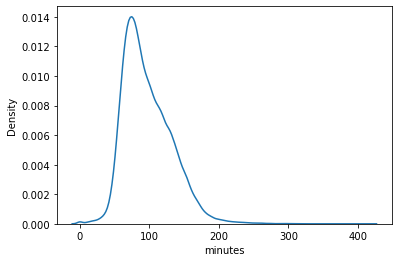

In [54]:
sns.kdeplot(data=match[match.minutes < 500], x="minutes")

In [62]:
np.median(match.winner_rank), np.median(match.winner_rank_points)

(151.0, nan)

In [65]:
match['winner_rank'] = match.winner_rank.fillna(int(np.median(match.winner_rank)))
match['winner_rank_points'] = match.winner_rank_points.fillna(int(np.nanmedian(match.winner_rank_points)))
match['loser_rank'] = match.loser_rank.fillna(int(np.nanmedian(match.loser_rank)))
match['loser_rank_points'] = match.loser_rank_points.fillna(int(np.nanmedian(match.loser_rank_points)))

match['minutes'] = match.groupby('tourney_pk')['minutes'].apply(lambda x: x.ffill().bfill())
match = match.dropna(subset=['minutes'])

match = match.astype({"minutes": int, "w_ace": int, "w_df": int, "w_svpt": int,
                      "w_1stIn": int, "w_1stWon": int, "w_2ndWon": int, "w_SvGms": int,
                      "w_bpSaved": int, "w_bpFaced": int, "l_ace": int, "l_df": int,
                      "l_svpt": int, "l_1stIn": int, "l_1stWon": int, "l_2ndWon": int,
                      "l_SvGms": int, "l_bpSaved": int, "l_bpFaced": int
                    })

<AxesSubplot:>

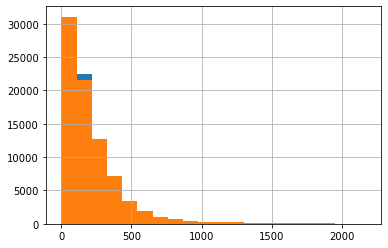

In [66]:
match['winner_rank'].hist(bins=20)
match_originale['winner_rank'].hist(bins=20)

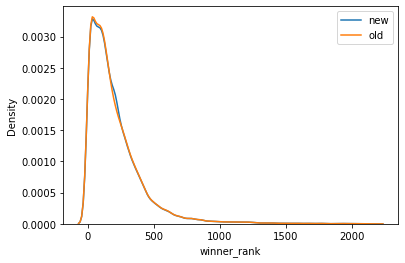

In [67]:
sns.kdeplot(data=match['winner_rank'], label='new')
sns.kdeplot(data=match_originale['winner_rank'], label='old')
plt.legend()

<AxesSubplot:>

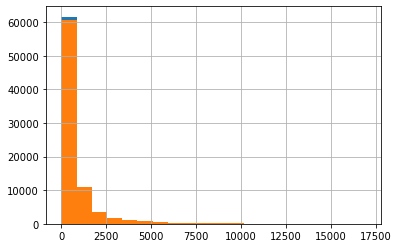

In [68]:
match['winner_rank_points'].hist(bins=20)
match_originale['winner_rank_points'].hist(bins=20)

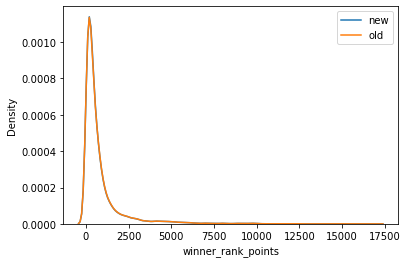

In [69]:
sns.kdeplot(data=match['winner_rank_points'], label='new')
sns.kdeplot(data=match_originale['winner_rank_points'], label='old')
plt.legend()

<AxesSubplot:>

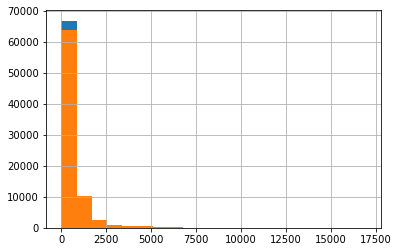

In [70]:
match['loser_rank_points'].hist(bins=20)
match_originale['loser_rank_points'].hist(bins=20)

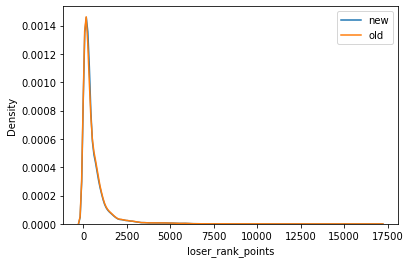

In [71]:
sns.kdeplot(data=match['loser_rank_points'], label='new')
sns.kdeplot(data=match_originale['loser_rank_points'], label='old')
plt.legend()

<AxesSubplot:>

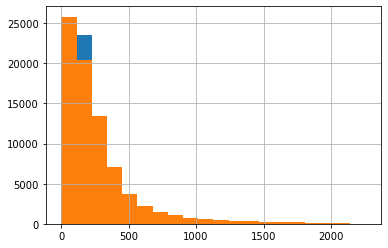

In [72]:
match['loser_rank'].hist(bins=20)
match_originale['loser_rank'].hist(bins=20)

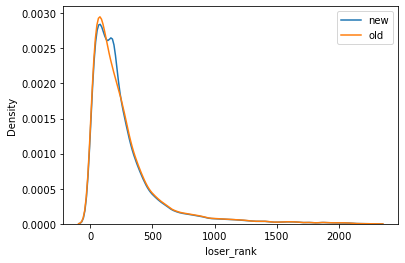

In [73]:
sns.kdeplot(data=match['loser_rank'], label='new')
sns.kdeplot(data=match_originale['loser_rank'], label='old')
plt.legend()

## Player - gestione hand e ht

In [78]:
#outlier
player_originale.loc[player_originale.ht < 100, 'ht'] = None
player.loc[player.ht < 100, 'ht'] = None

<AxesSubplot:xlabel='ht', ylabel='Density'>

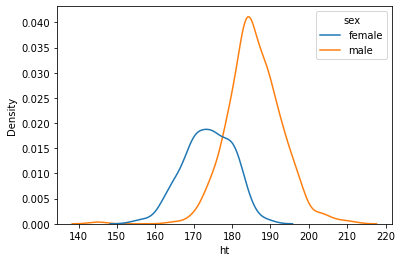

In [79]:
sns.kdeplot(data=player, x="ht", hue="sex")

In [81]:
player.loc[player.year_of_birth < 1, 'year_of_birth'] = None
player_originale.loc[player_originale.year_of_birth < 1, 'year_of_birth'] = None

player.isna().sum()

player_id           0
country_id          0
name                0
sex                 0
hand               33
ht               9552
year_of_birth    2108
dtype: int64

In [82]:
player['hand'] = player.hand.fillna('U')
player['ht'] = player.groupby('sex')['ht'].apply(lambda x: x.ffill().bfill())

<AxesSubplot:>

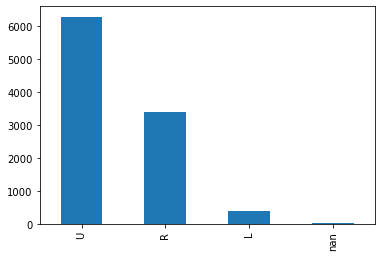

In [83]:
player['hand'].value_counts(dropna=False).plot(kind="bar")
player_originale['hand'].value_counts(dropna=False).plot(kind="bar")

<AxesSubplot:>

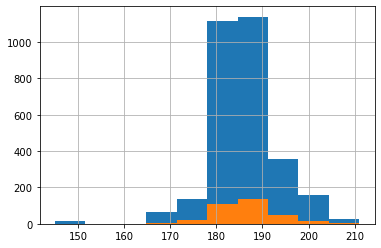

In [31]:
player['ht'][player.sex == "male"].hist()
player_originale['ht'][player.sex == "male"].hist()

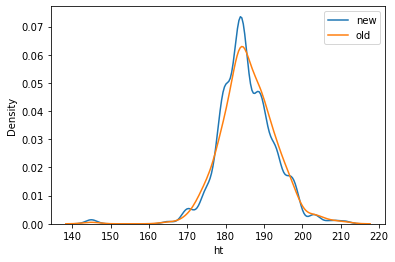

In [84]:
sns.kdeplot(data=player['ht'][player.sex == "male"], label='new')
sns.kdeplot(data=player_originale['ht'][player.sex == "male"], label='old')
plt.legend()

<AxesSubplot:>

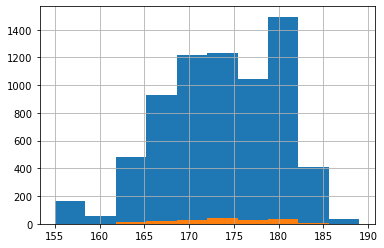

In [32]:
player['ht'][player.sex != "male"].hist()
player_originale['ht'][player.sex != "male"].hist()

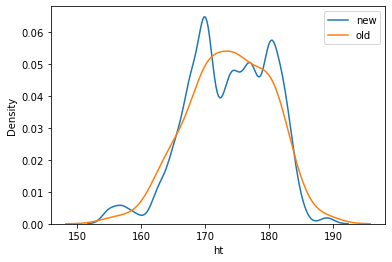

In [85]:
sns.kdeplot(data=player['ht'][player.sex != "male"], label='new')
sns.kdeplot(data=player_originale['ht'][player.sex != "male"], label='old')
plt.legend()

<AxesSubplot:>

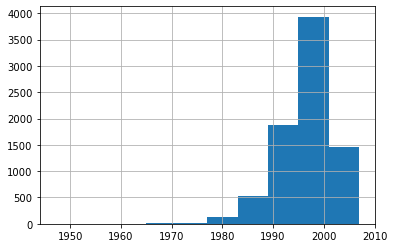

In [91]:
player['year_of_birth'].hist()

<AxesSubplot:>

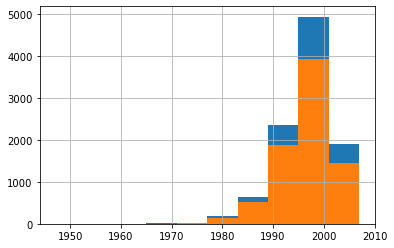

In [92]:
player['year_of_birth'] = player.year_of_birth.ffill().bfill()

player['year_of_birth'].hist()
player_originale['year_of_birth'].hist()

In [93]:
player = player.astype({"ht": int, "year_of_birth": int})

## Tournament - gestione surface 

In [94]:
tournament.isna().sum()

tourney_pk             0
tourney_id             0
date_id                0
tourney_name           0
surface               62
draw_size              0
tourney_level          0
tourney_spectators     0
tourney_revenue        0
dtype: int64

In [95]:
tournament['surface'] = tournament.groupby('tourney_name')['surface'].apply(lambda x: x.ffill().bfill())
tournament['surface'] = tournament.surface.fillna('Hard')

<AxesSubplot:>

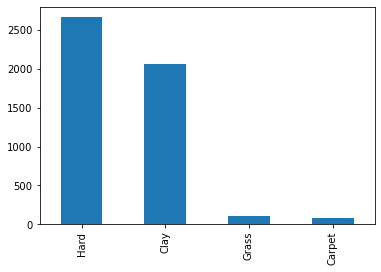

In [96]:
tournament_originale.surface.value_counts(dropna=False).plot(kind="bar")
tournament.surface.value_counts().plot(kind="bar")


In [98]:
match.to_csv('output/match_noNull.csv', index=False)
player.to_csv('output/players_noNull.csv', index=False)
tournament.to_csv('output/tournament_noNull.csv', index=False)

In [99]:
match

,match_num,winner_id,loser_id,score,best_of,round,minutes,w_ace,w_df,w_svpt,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,tourney_pk
1,287,201580,214643,7-5 6-4,3,R16,98,0,2,67,...,19,16,11,8,14,182.0,326.0,147.0,402.0,2019-1094I201930715Lausanne
4,291,111575,105379,7-6(4) 5-7 6-4,3,R16,147,7,3,110,...,43,25,17,2,4,32.0,1249.0,46.0,933.0,2017-0414A201730724Hamburg
6,293,201697,204430,6-2 6-4,3,R16,75,10,3,49,...,27,9,9,6,10,101.0,606.0,182.0,328.0,2019-1101I201920408Lugano
10,1,202604,203567,3-6 6-2 6-2,3,RR,106,2,2,74,...,25,14,12,9,17,462.0,57.0,516.0,41.0,2019-W-FC-2019-G1-EPA-B-PP5-8-GRE-TUR-01D20191...
12,208,200033,201540,7-5 7-6(2),3,R32,109,13,3,76,...,33,19,12,5,8,181.0,315.0,62.0,926.0,2018-540G201830702Wimbledon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185751,249,106109,208143,6-1 6-4,3,Q1,60,4,3,47,...,16,11,9,4,8,169.0,333.0,1425.0,2.0,2018-6116A201830723Atlanta
185752,276,104871,104677,6-4 6-2,3,R32,61,1,1,46,...,23,11,9,3,6,71.0,705.0,184.0,309.0,2017-0301A201710109Auckland
185753,267,202467,201565,6-4 6-2,3,Q3,93,3,0,48,...,26,8,9,6,11,136.0,416.0,295.0,142.0,2016-1079I201630711Bucharest
185755,275,214263,201478,6-4 4-6 7-6(5),3,R32,145,0,4,136,...,50,15,16,7,12,210.0,398.0,167.0,361.0,2019-2001C201941111Houston


In [100]:
match[['match_num','winner_id','tourney_pk']].drop_duplicates()

,match_num,winner_id,tourney_pk
1,287,201580,2019-1094I201930715Lausanne
4,291,111575,2017-0414A201730724Hamburg
6,293,201697,2019-1101I201920408Lugano
10,1,202604,2019-W-FC-2019-G1-EPA-B-PP5-8-GRE-TUR-01D20191...
12,208,200033,2018-540G201830702Wimbledon
...,...,...,...
185751,249,106109,2018-6116A201830723Atlanta
185752,276,104871,2017-0301A201710109Auckland
185753,267,202467,2016-1079I201630711Bucharest
185755,275,214263,2019-2001C201941111Houston
